# Airlines Passenger Satisfaction Analysis

## Introduction

#### This notebook presents an analysis of airline passenger satisfaction by examining various factors that influence the overall travel experience. The study aims to identify key determinants that contribute to passenger satisfaction or dissatisfaction by leveraging data-driven techniques. Through a structured approach, the analysis explores patterns in customer feedback and flight-related attributes to provide meaningful insights.

#### The dataset undergoes a thorough preprocessing phase, which includes handling missing values, encoding categorical variables, and standardizing numerical features. This ensures that the data is clean and suitable for further analysis. Following this, exploratory data analysis is conducted to visualize and understand the relationships between different factors such as flight delays, travel class, and customer service ratings, and their impact on passenger satisfaction.

#### A predictive model is then developed using logistic regression to classify whether a passenger is satisfied based on key flight attributes. The model’s performance is evaluated using metrics such as accuracy, precision, recall, and a confusion matrix to assess its effectiveness in distinguishing satisfied passengers from those who are neutral or dissatisfied.

#### By the end of this analysis, the findings aim to provide valuable insights into the factors that most significantly influence customer satisfaction. These insights can assist airlines in making informed decisions to enhance service quality, minimize negative experiences, and ultimately improve overall passenger satisfaction.

## Step 1: Import the Libraries and Load the Dataset

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [84]:
data = pd.read_csv("/Users/mironshohshukurdjanov/Downloads/archive/airline_passenger_satisfaction.csv")

## Step 2: Inspect the Data

In [85]:
data.shape

(129880, 24)

In [86]:
data.head(10)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
5,6,Male,43,Returning,Business,Business,3788,0,0.0,4,...,4,4,4,3,3,4,4,4,4,Satisfied
6,7,Male,43,Returning,Business,Business,1963,0,0.0,3,...,5,5,5,4,5,5,3,5,5,Satisfied
7,8,Female,60,Returning,Business,Business,853,0,3.0,3,...,3,4,4,4,4,3,4,3,3,Satisfied
8,9,Male,50,Returning,Business,Business,2607,0,0.0,1,...,4,3,4,3,3,4,4,4,4,Neutral or Dissatisfied
9,10,Female,38,Returning,Business,Business,2822,13,0.0,2,...,5,4,5,4,2,5,2,5,5,Satisfied


In [87]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

None

In [88]:
data.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [89]:
missing_values = data.isnull().sum()
print (f"Missing Values:\n{missing_values}")

Missing Values:
ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertai

## Step 3: Clean the Data

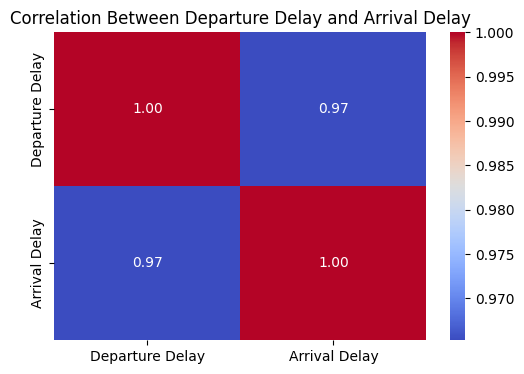

Correlation between Departure Delay and Arrival Delay:
                 Departure Delay  Arrival Delay
Departure Delay         1.000000       0.965291
Arrival Delay           0.965291       1.000000


In [90]:
correlation = data[['Departure Delay', 'Arrival Delay']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Departure Delay and Arrival Delay")
plt.show()
print("Correlation between Departure Delay and Arrival Delay:")
print(correlation)

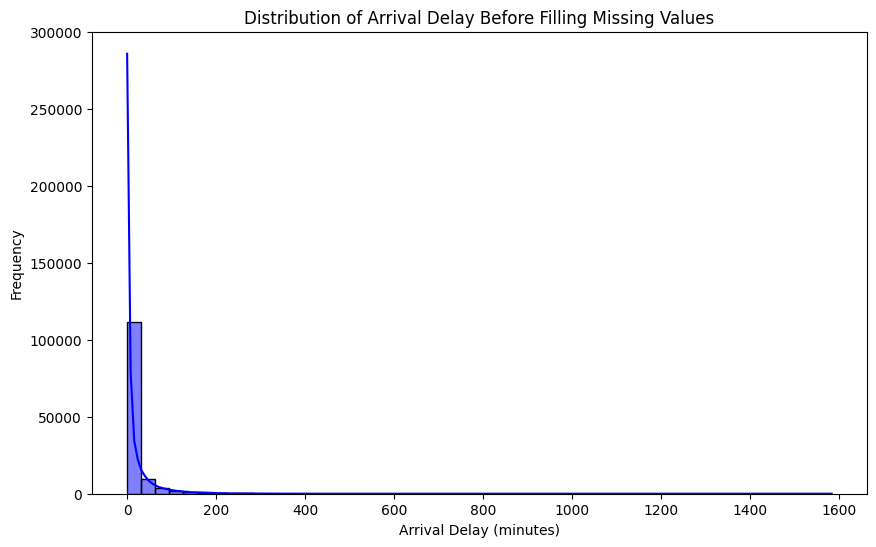

In [91]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Arrival Delay'], bins=50, kde=True, color='blue')
plt.title("Distribution of Arrival Delay Before Filling Missing Values")
plt.xlabel("Arrival Delay (minutes)")
plt.ylabel("Frequency")
plt.show()

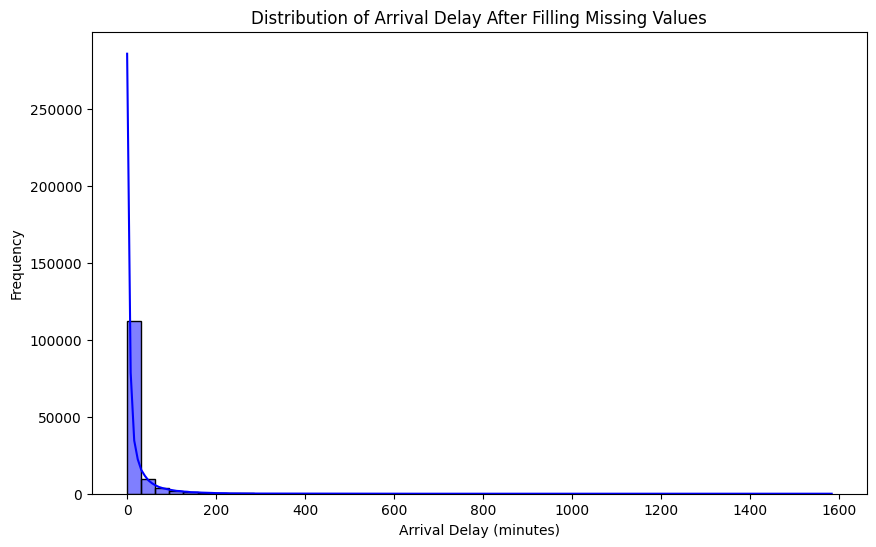

In [101]:
data.loc[:, 'Arrival Delay'] = data['Arrival Delay'].fillna(data['Departure Delay'])

plt.figure(figsize=(10, 6))
sns.histplot(data['Arrival Delay'], bins=50, kde=True, color='blue')
plt.title("Distribution of Arrival Delay After Filling Missing Values")
plt.xlabel("Arrival Delay (minutes)")
plt.ylabel("Frequency")
plt.show()

In [102]:
missing_values = data.isnull().sum()
print (f"Missing Values:\n{missing_values}")

Missing Values:
ID                                        0
Age                                       0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                          0
Satisfaction                              0
Gender_Male                               0
Customer Type_Returning                   0
Travel Type     

#### The decision to use “Departure Delay” to fill missing values in “Arrival Delay” was based on the strong correlation (~0.97) between the two variables, as observed in the heatmap analysis. This high correlation indicates that flights experiencing departure delays tend to have similar arrival delays, making “Departure Delay” a logical and data-driven choice for imputation. By using this approach, we preserved the natural relationship between the two variables, ensuring consistency in the dataset. Additionally, after filling the missing values, the distribution of “Arrival Delay” remained unchanged, confirming that the imputation method did not introduce any distortions or biases in the data.

## Step 4: Encode Categorical Variables and Convert Categorical Features to Numerical 
(0 = Neuteral/Dissatisfied, 1 = Satisfied)

In [96]:
le = LabelEncoder()
data['Satisfaction'] = le.fit_transform(data['Satisfaction'])
data = pd.get_dummies(data, drop_first=True)

## Step 5: Exploratory Data Analysis (EDA)

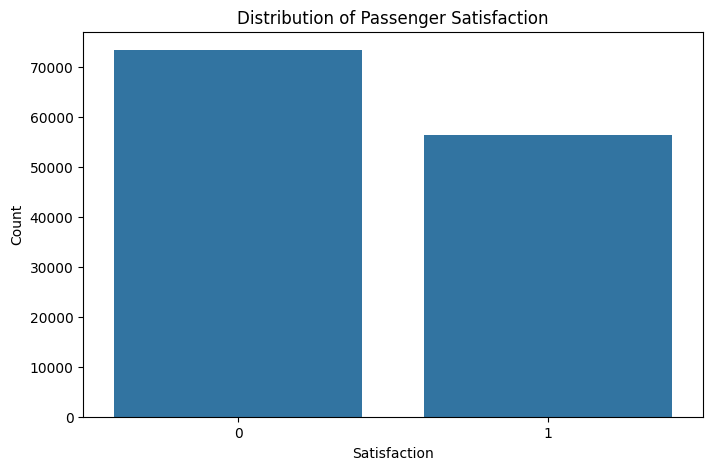

In [97]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Satisfaction', data=data)
plt.title("Distribution of Passenger Satisfaction")
plt.ylabel("Count")
plt.show()

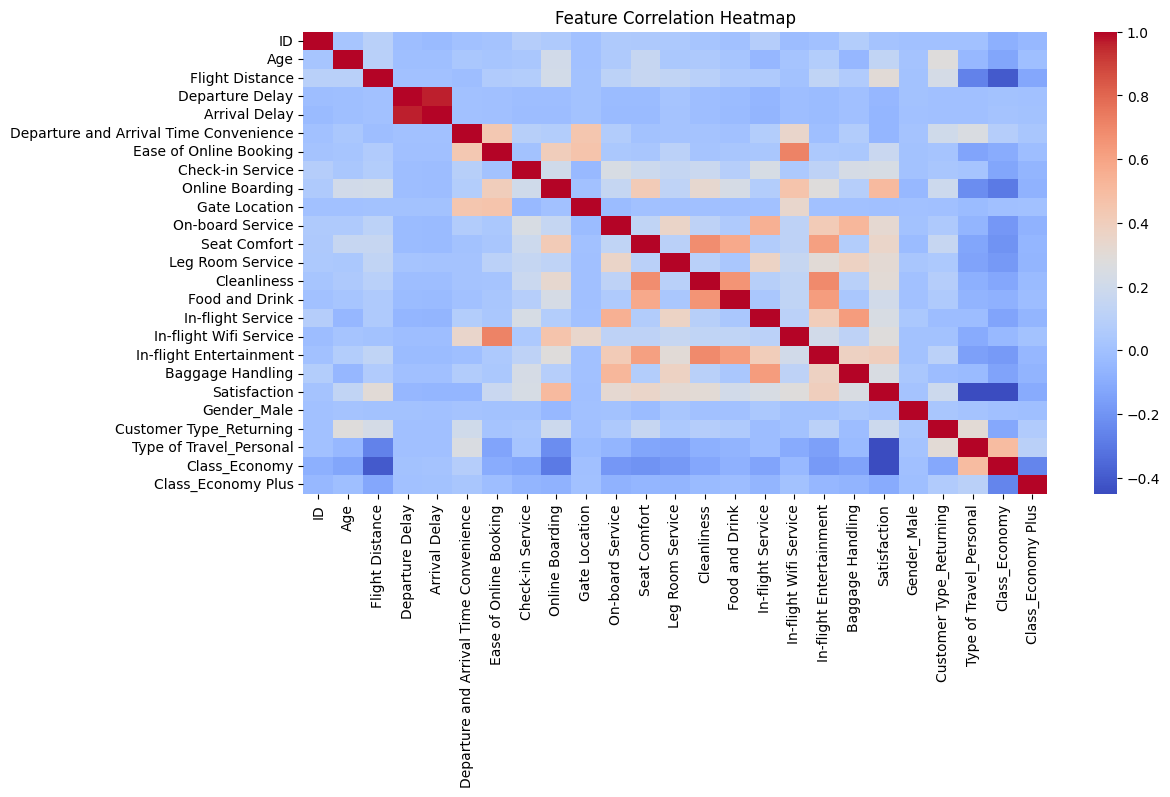

In [73]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

#### The heatmap reveals significant correlations between various features in the airline passenger satisfaction dataset. A strong positive correlation is observed between departure delay and arrival delay, indicating that flights departing late are highly likely to arrive late as well. Additionally, seat comfort, legroom service, cleanliness, and in-flight entertainment exhibit a notable positive correlation with passenger satisfaction, suggesting that higher ratings in these areas are associated with increased satisfaction levels. Conversely, arrival delay shows a negative correlation with satisfaction, implying that passengers tend to be less satisfied when their flights experience delays. A similar negative correlation is observed between satisfaction and economy class, indicating that passengers in economy class are generally less satisfied compared to those in business or first class. Meanwhile, variables such as gender and gate location demonstrate minimal correlation with satisfaction, suggesting that these factors do not significantly influence passengers’ overall experience. These insights highlight the importance of reducing delays and enhancing comfort, cleanliness, and entertainment to improve passenger satisfaction.

In [98]:
data.rename(columns={"Type of Travel_Personal": "Travel Type"}, inplace=True)

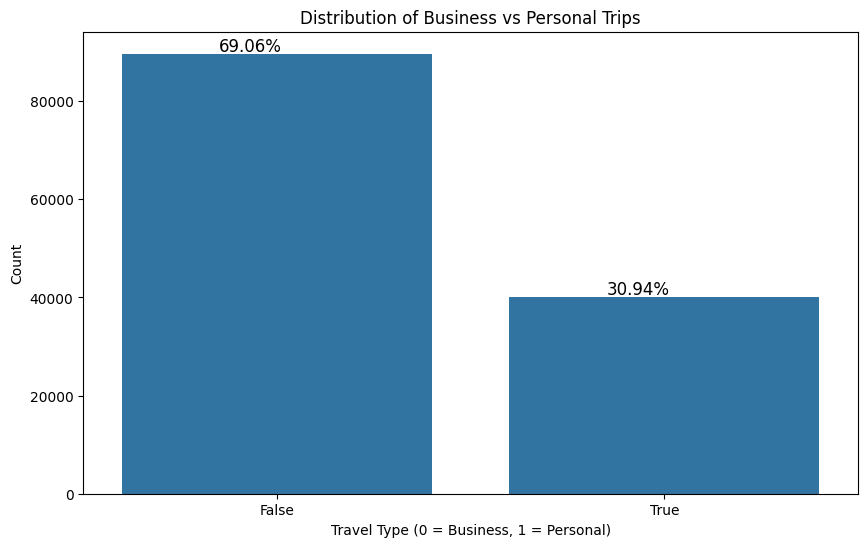

In [100]:
plt.figure(figsize=(10, 6))
x = sns.countplot(data=data, x='Travel Type')

# Add percentage annotations
for i in x.patches:
    x.annotate('{:.2f}%'.format((i.get_height() /data.shape[0]) * 100),
               (i.get_x() + 0.25, i.get_height() + 500), fontsize=12)

plt.title("Distribution of Business vs Personal Trips")
plt.xlabel("Travel Type (0 = Business, 1 = Personal)")
plt.ylabel("Count")
plt.show()

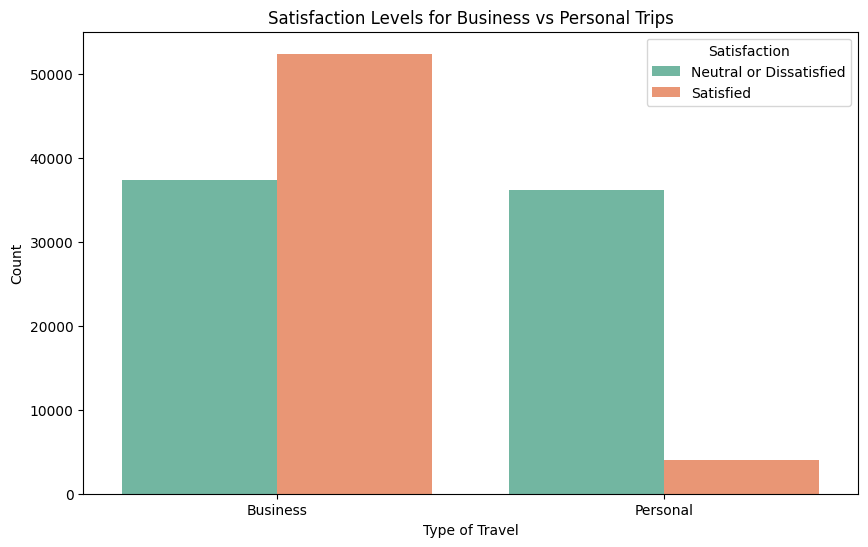

In [103]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Travel Type', hue='Satisfaction', palette="Set2")

plt.xticks(ticks=[0, 1], labels=["Business", "Personal"])
plt.xlabel("Type of Travel")
plt.ylabel("Count")
plt.title("Satisfaction Levels for Business vs Personal Trips")
plt.legend(title="Satisfaction", labels=["Neutral or Dissatisfied", "Satisfied"])
plt.show()

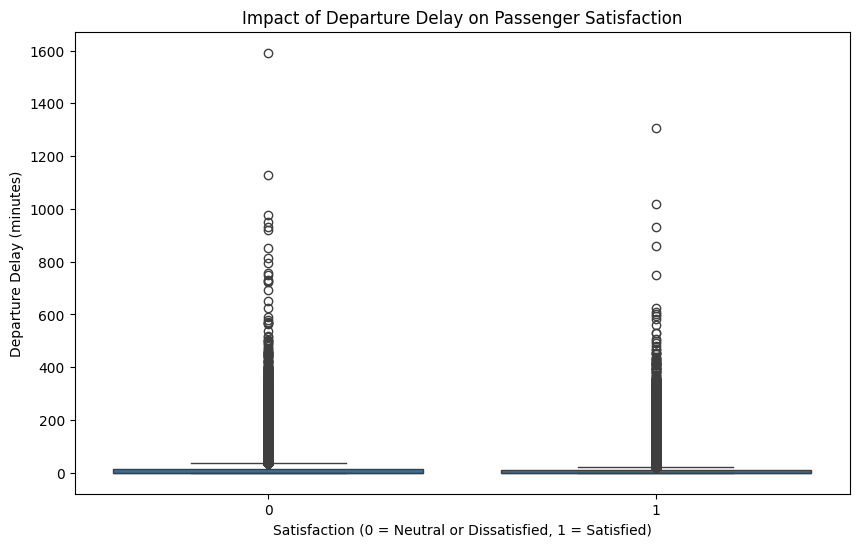

In [104]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Satisfaction', y='Departure Delay', data=data)
plt.title("Impact of Departure Delay on Passenger Satisfaction")
plt.xlabel("Satisfaction (0 = Neutral or Dissatisfied, 1 = Satisfied)")
plt.ylabel("Departure Delay (minutes)")
plt.show()

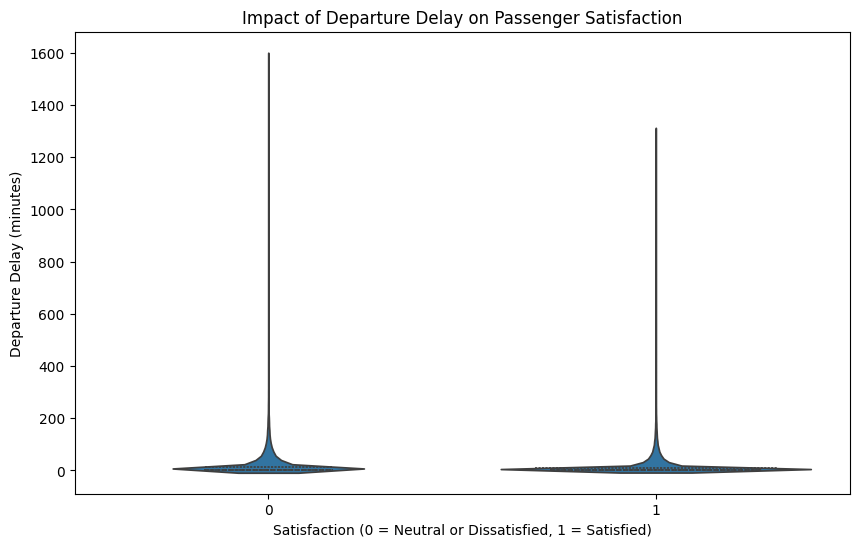

In [105]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Satisfaction', y='Departure Delay', data=data, inner='quartile')
plt.title("Impact of Departure Delay on Passenger Satisfaction")
plt.xlabel("Satisfaction (0 = Neutral or Dissatisfied, 1 = Satisfied)")
plt.ylabel("Departure Delay (minutes)")
plt.show()

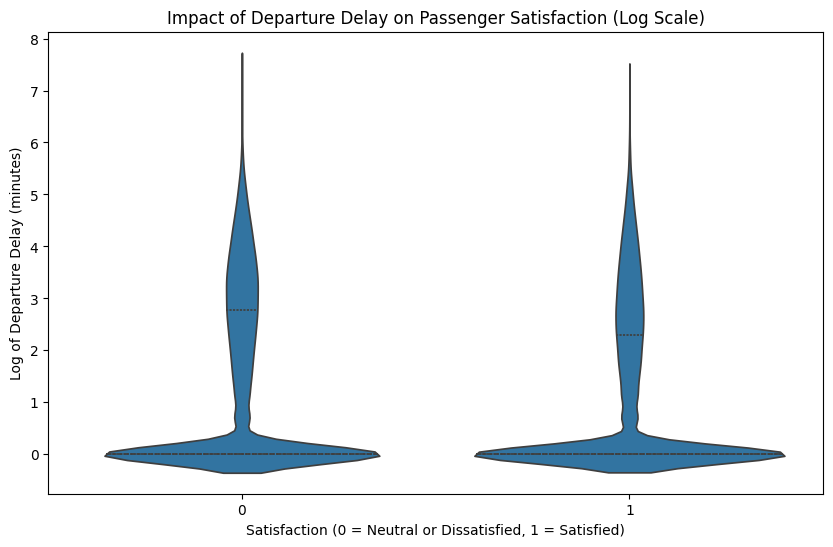

In [106]:
data['Log Departure Delay'] = np.log1p(data['Departure Delay'])

plt.figure(figsize=(10, 6))
sns.violinplot(x='Satisfaction', y='Log Departure Delay', data=data, inner='quartile')
plt.title("Impact of Departure Delay on Passenger Satisfaction (Log Scale)")
plt.xlabel("Satisfaction (0 = Neutral or Dissatisfied, 1 = Satisfied)")
plt.ylabel("Log of Departure Delay (minutes)")
plt.show()

#### The analysis confirms that departure delays negatively impact passenger satisfaction. The box plot shows that while most flights experience minimal delays, longer delays are more common among dissatisfied passengers. The violin plot further highlights that moderate delays (5-50 minutes) are more frequent among dissatisfied passengers, though some remain satisfied despite longer waits, likely due to other factors like service quality.

#### To improve clarity, a log transformation was applied to handle extreme outliers, making it easier to see trends in moderate delays. The findings suggest that short delays are tolerated, but as delays increase, satisfaction drops significantly. While on-time performance is crucial, airlines can mitigate dissatisfaction through better service, comfort, or compensation.

## Step 6: Building and Evaluating the Logistic Regression Model

In [110]:
# Define features and target variable
X = data.drop(columns=['Satisfaction'])
y = data['Satisfaction']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a logistic regression model
model = LogisticRegression(C=0.5, solver='liblinear')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [111]:
# Model evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score: 0.8763858946720049
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89     14723
           1       0.87      0.84      0.85     11253

    accuracy                           0.88     25976
   macro avg       0.88      0.87      0.87     25976
weighted avg       0.88      0.88      0.88     25976

Confusion Matrix:
 [[13304  1419]
 [ 1792  9461]]


#### The logistic regression model achieved an accuracy of 87.6%, indicating strong predictive performance. The classification report shows balanced precision (aprx: 88%) and recall (aprx: 87%) across both classes, meaning the model effectively differentiates between satisfied and dissatisfied passengers. The confusion matrix reveals that the model correctly classified most instances, with minor misclassifications (1,419 false positives and 1,792 false negatives). Overall, the model is well-calibrated and effectively predicts passenger satisfaction.

## References

Dataset Link: https://www.kaggle.com/datasets/mysarahmadbhat/airline-passenger-satisfaction?utm_source=chatgpt.com